# Pretpostavke linearne regresije

<img style="float:right; max-width:400px" src="imgs/illustration.jpeg" width="60%" />

Pretpostavke linearne regresije - su osnovni uslovi koji se moraju ispuniti kako bi dobili pouzdane i validne rezultate u analizi odnosa između nezavisne promenljive $X$ i zavisne promenljive $Y$. Pretpostavke osiguravaju da naš odabrani model linearne regresije odgovara podacima i da će predikcije biti precizne i pouzdane unutar određenih intervala.

Pretpostavke se mogu proveriti vizualno koristeći grafike, ili koristeći statističke testove.

**L.I.N.E. pretpostavke** - 4 glavne pretpostavke moraju da važe, kako bi bili sigurni da je regresioni model pogodan za dati problem:

- [Linearnost](#1.-Linearity)
- [Independece of errors](#2.-Independece-of-errors)
- [Normality of errors](#3.-Normality-of-errors)
- [Equal variance](#4.-Equal-variance)

U nastavku pokazujemo sve 4 pretpostavke koristeći skup podatak o kućama iz kanadskog grada Windsor (1987). Pravimo model linearne regresije koji predviđa cenu kuće na osnovu površine placa.


Učitavamo potrebne biblioteke i skup podataka:

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import numpy as np
import statsmodels.api as sm
matplotlib.rcParams['figure.figsize'] = (8, 4)
sb.set(font_scale=1.)

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('data/housing.csv', sep=',')
df.head()

,price,lotsize(m^2),bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,74700,658.4799,3,1,1,1,1,1,0,0,2,1
1,85000,652.4388,3,1,1,1,0,1,0,1,2,1
2,68500,650.5800,3,1,2,1,0,1,0,0,0,0
3,82900,650.5800,3,1,1,1,0,1,0,0,2,1
4,86000,641.2860,3,2,1,1,1,1,0,0,0,1


## 1. Linearity
Linearnost - pretpostavka važi kada je odnos izmedju $X$ i $Y$ linearan ✅.

Pravimo model linearne regresije koji predviđa cenu kuće $Y$ na osnovu površine placa $X$.
Određujemo parametre modela $y=ax + b$, presek i nagib, kao i na prethodnim vežbama.

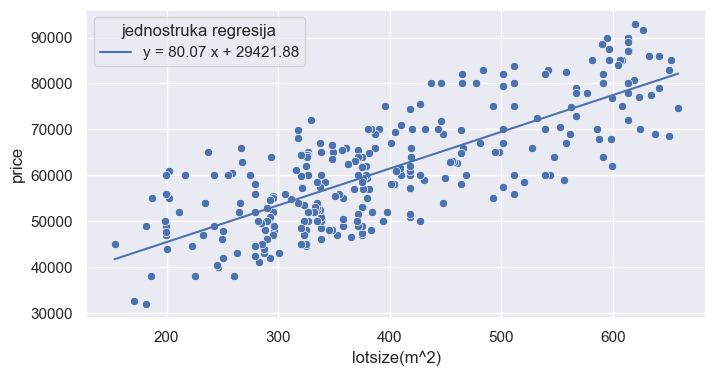

In [6]:
x = df['lotsize(m^2)'].values.reshape(-1,1)
y = df['price']
from sklearn.linear_model import LinearRegression

# izračunaj nagib i presek za liniju koja se najbolja uklapa (best fit)
model = LinearRegression()
model.fit(x, y)

slope = model.coef_.item()
intercept = model.intercept_.item()

# prediktuj y za svako x
y_pred = model.predict(x)

# plotuj podatke i liniju koja se nabolje uklapa (best fit)
sb.scatterplot(data=df, x='lotsize(m^2)', y='price');
plt.plot(x, y_pred, 'b', label=f'y = {slope:.2f} x + {intercept:.2f}')
plt.legend(title='jednostruka regresija')
plt.show()

### $Y$ vs $\hat{Y}$
Sa prethodnog grafika vidimo da je odnos između $X$ i $Y$ linearan. Da bismo bili sigurni, uporedićemo `y` i `y_pred`, odnosno $Y$ i $\hat{Y}$.

Tačke na grafiku treba da budu blizu prave $x=y$ kako bi predikcije bile tačne. Velika odstupanja bi ukazivala da linearni model nije adekvatan ❌, a mala odsupanja da jeste adekvatan ✅.

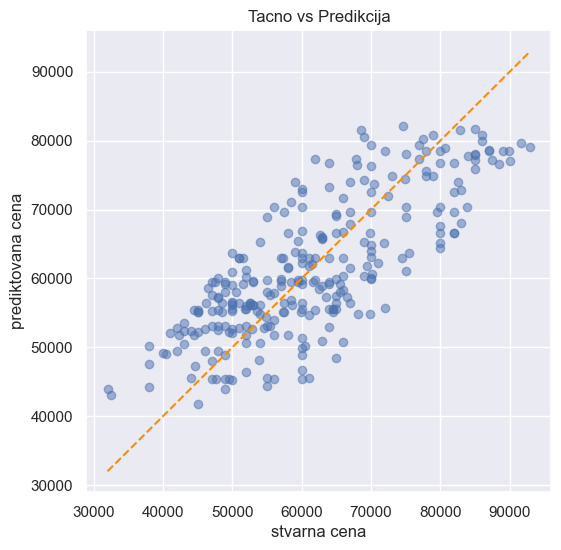

In [7]:
plt.figure(figsize=(6,6))
plt.scatter(y, y_pred, alpha=.5)

# x = y line
line_coords = np.linspace(np.concatenate([y, y_pred]).min(), np.concatenate([y, y_pred]).max())
plt.plot(line_coords, line_coords, color='darkorange', linestyle='--')
plt.title('Tacno vs Predikcija')
plt.xlabel('stvarna cena')
plt.ylabel('prediktovana cena')
plt.show()

Pošto nema većih odstupanja, linearnost je zadovoljena ✅.

(Ukoliko bismo na grafiku uočili velika odstupanja, zaključili bi da je linearni model pogrešan izbor.)

## 2. Independece of errors
Nezavisnost grešaka - pretpostavka važi kada su greške statistički nezavisne. 

Testiramo tako što: crtamo grafik reziduala.
Ako grafik reziduala ima uočljiv šablon, onda je pretpostavka narušena ❌. Pretpostavka važi kada nema šablona ✅.
Testira se nad **rezidualima**, ne nad osobinama.

### Reziduali
Podsedimo se: reziduali su procene grešaka iz uzorka podataka. To je razlika između prave i procenjene vrednosti $ e = y - \hat{y}$.
Primer reziduala: Narandžastom linijom pokazujemo odstupanje $\hat{y_i}$ od stvarne vrednosti $y_i$.

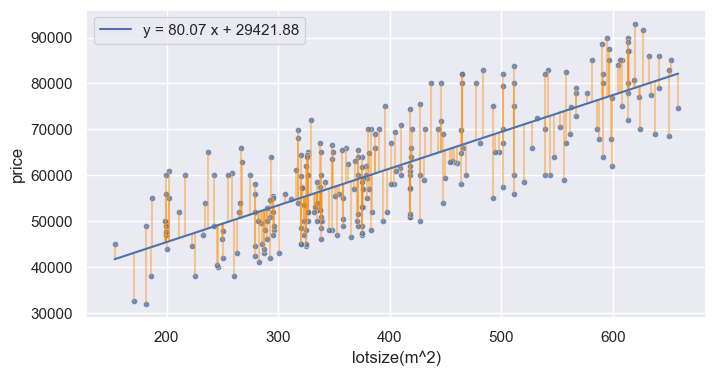

In [8]:
for i in range(len(x)):
    plt.plot([x[i], x[i]], [y[i], y_pred[i]], color='darkorange', linestyle='-', alpha=0.4)

sb.scatterplot(data=df, x='lotsize(m^2)', y='price', alpha=0.8, s=20)
plt.plot(x, y_pred, 'b', label=f'y = {slope:.2f} x + {intercept:.2f}')
plt.legend()
plt.show()

Enkapsuliramo kod u funkciju koja računa rezidual za svako `y` i `y_pred`. 
Prikazujemo grafik reziduala; na x-osi se nalazi prediktovana vrednost $\hat{y}$, a na y-osi su reziduali $e$.

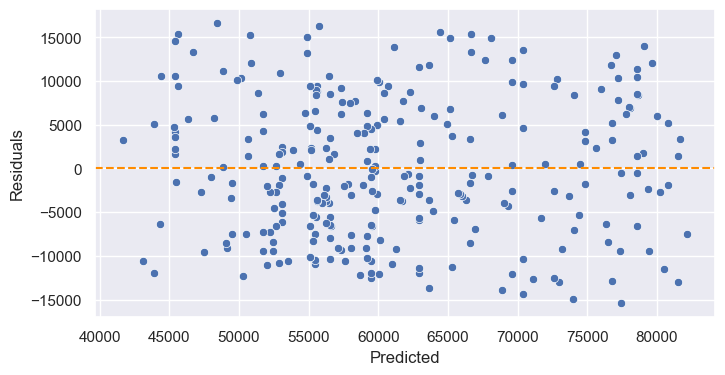

In [14]:
def calculate_residuals(model, features, labels):
    '''Calculates residuals between true value `labels` and predicted value.'''
    y_pred = model.predict(features)
    df_results = pd.DataFrame({'Actual': labels, 'Predicted': y_pred})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])
    return df_results


df_results = calculate_residuals(model, x, y)
df_results.head()
sb.scatterplot(x='Predicted', y='Residuals', data=df_results)
plt.axhline(y=0, color='darkorange', linestyle='--')
plt.show()

Ovaj grafik nema uočljiv šablon, pa zaključujemo da su greške nezavisne, odnosno pretpostavka važi ✅.

### Durbin-Watson statistički test
Alternativni način da proverimo nezavisnost grešaka je koristeći *Durbin-Watson* statistički test. Ovaj test proverava autokorelaciju između reziduala; proverava da li postoji šablon u podacima.
Tumačenje autokorelacije za vrednost $d$:
- 1.5 <= d <= 2: Nema autokorelacije - pretpostavka važi ✅.
- d < 1.5: Pozitivna autokorelacija - pretpostavka ne važi ❌.
- d > 2: Negativna autokorelacija - pretpostavka ne važi ❌.

In [7]:
from statsmodels.stats.stattools import durbin_watson
durbinWatson = durbin_watson(df_results['Residuals'])
print('Durbin-Watson:', durbinWatson)
if durbinWatson < 1.5:
    print('pozitivna autokorelacija')
elif durbinWatson > 2:
    print('negativna autokorelacija')
else:
    print('nema autokorelacije (ili vrlo malo)')

Durbin-Watson: 1.7798060672748417
nema autokorelacije (ili vrlo malo)


Reziduali nisu autokorelirani, pa pretpostvka važi ✅.
*Napomena: ovo smo već prikazali preko grafika reziduala, sada smo samo potvrdili.*

## 3. Normality of errors
Normalnost grešaka - pretpostavka važi kada su zadovljene dve podpretpostavke:
1. Srednja vrednost 0 za greške.
2. Greške su normalno distribuirane.

*Napomena: Bitnije je da je srednja vrednost 0 za greške, nego da su greške normalno distribuirane jer distribucija grešaka zavisi od uzorka podataka (detaljnije na predavanjima).*

### 3.1 Srednja vrednost 0 za greške
Testiramo prvu pretpostavku da greške imaju srednju vrednost 0.
Greške već po definiciji imaju srednju vrednost 0.
Možemo se i sami uveriti da će srednja greška biti 0.

In [8]:
df_results['Residuals'].mean()

4.651415760495833e-12

Prethodni broj je veoma blizu 0. Zašto prethodni broj nije tačno 0? - Zbog zaokruživanja brojeva (numerička nestabilnost).

Greške po definiciji imaju srednju vrednost 0, i nije dovoljno da samo izračunamo srednju vrednost. Zato koristimo metodu - *LOWESS (locally weighted scatterplot smoothing)* - gde želimo da dobijemo što ravniju liniju.

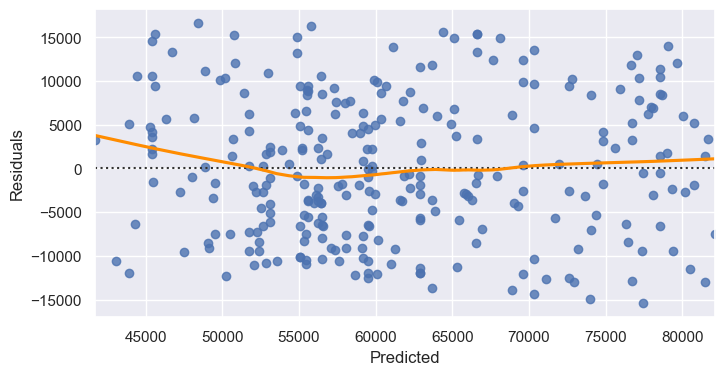

In [41]:
sb.residplot(data=df_results, x='Predicted', y='Residuals', lowess=True,  line_kws={'color': 'darkorange'})
plt.show()

Reziduali ne odstupaju mnogo od nule, pa pretpostavka da su greške distribuirane oko 0 važi ✅.


#### 3.2 Greške su normalno distribuirane
Pretpostavku testiramo pomoću histograma reziduala. 
Reziduali na histogramu treba da budu normalno distribuirani - puno malih i malo velikih grešaka, podjednako pozitivne i negativne.
*Histogram prikazuje broj primera (frekvenciju) unutar unapred definisanih intervala (binova).*

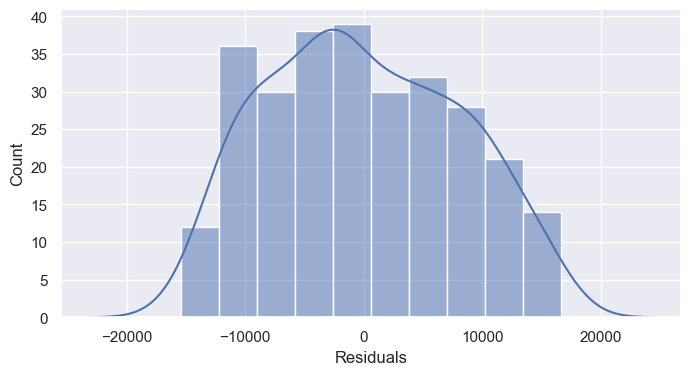

In [10]:
sb.histplot(df_results['Residuals'], kde=True, kde_kws=dict(cut=3));

Izgleda da greške nisu normalno distribuirane. Da bi bili sigurni, koristimo *Anderson-Darling* statistički test. Ovaj test vraća p-vrednost. Tumačenje:
- ako je p-vrednost >= praga - distribucija je normalna ✅.
- ako je p-vrednost < praga - distribucija nije normalna ❌.

In [11]:
p_value_thresh = 0.05 # obicno se za prag uzima granica od 5%
from statsmodels.stats.diagnostic import normal_ad
p_value = normal_ad(df_results['Residuals'])[1]
dist_type = 'normal' if p_value >= p_value_thresh else 'non-normal'

if dist_type == 'normal': print('Reziduali su normalno distribuirani.')
if dist_type == 'non-normal': print('Reziduali nisu normalno distribuirani.')
print(p_value)

Reziduali nisu normalno distribuirani.
0.00013531311398602962


Iz priloženog vidimo da reziduali imaju srednju vrednost 0, ali nisu normalno distribuirani, pa pretpostavka ne važi ❌.
Ipak, ukoliko je uzorak podatak velik (što jeste u našem slučaju), možemo zanemariti to što reziduali nisu normalno distribuirani smatrati ovu pretpostavku validnom ✅.


<p>

## 4. Equal variance
Jednaka varijansa - pretpostavka važi kada gausijane grešaka oko regresione prave imaju jednaku varijansu ✅.
Jednaku varijansu vidimo sa grafika reziduala - pretpostavka važi kada nema šablona u rezidualima.
Tada distribucija reziduala oko srednje vrednosti 0 ima jednaku varijansu za svako $x_i$.
Primer na slici:

<img style="max-width:800px" src="imgs/equal_variance_example.png" width="60%" />

</p>

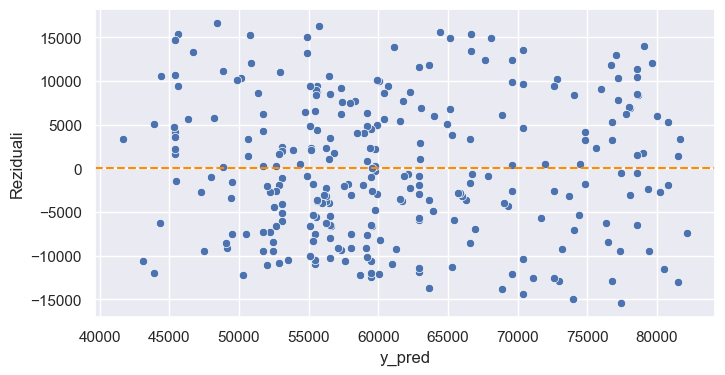

In [12]:
df_results = calculate_residuals(model, x, y)
sb.scatterplot(x='Predicted', y='Residuals', data=df_results)
plt.axhline(y=0, color='darkorange', linestyle='--')
plt.ylabel('Reziduali')
plt.xlabel('y_pred') # prediktovana cena
plt.show()

Pošto reziduali nemaju šablon, zaključujemo da pretpostavka važi ✅.

Jednaku varijansu možemo potvrditi i *Goldfeld-Quandt* testom.  Ovaj test vraća p-vrednost. Tumačenje:
- ako je p-vrednost >= praga - varijansa je jednaka ✅.
- ako je p-vrednost < praga - varijansa nije jednaka ❌.


In [14]:
x = sm.add_constant(x)
p_value = sm.stats.het_goldfeldquandt(df_results['Residuals'], x)[1]
dist_type = 'equal' if p_value >= p_value_thresh else 'non-equal'

if dist_type == 'equal': print('Jednaka varijansa.')
if dist_type == 'non-equal': print('Nije jednaka varijansa.')
print(p_value)

Jednaka varijansa.
0.9306038347903373


Dobijamo jednaku varijansu pa zaključujemo da ova pretpostavka važi.

# Zadaci

Napraviti regresioni model koji na osnovu površine placa predvidja cenu kuće koristeći [data/housing.csv](data/housing.csv). Zatim napraviti funkcije za svaku od L.I.N.E. pretpostavki u fajlu [src/line_pretpostavke.py](src/line_pretpostavke.py):
**TODO 1**: Za svaki od narednih zadataka učitati [housing skup podataka](data/housing.csv), napraviti regresioni model koji na osnovu površine placa predvidja cenu kuće, i zatim:
1. Napraviti funkciju `def linear_assumption(model, features, labels):` tako da funkcija na x-osi crta pravu vrednost, a na y-osi prediktovanu vrednost. Prediktovane vrednosti dobija predikcijom modela `model` nad osobinama `features`.
1. Napraviti funkciju `def independence_of_errors_assumption(model, features, labels):` tako da funkcija crta prediktovane vrednost na x-osi, a na y-osi reziduale. Zatim testira nezavisnost grešaka *Durbin-Watson* testom.
1. Napraviti funkciju `def normality_of_errors_assumption(model, features, label, p_value_thresh=0.05):` tako da funkcija crta histogram reziduala. Zatim proverava normalnost grešaka *Anderson-Darling* testom.
1. Napraviti funkciju `def equal_variance_assumption(model, features, labels, p_value_thresh=0.05):` tako da funkcija crta prediktovane vrednost na x-osi, a na y-osi reziduale. Zatim testira jednaku varijansu *Goldfeld-Quandt* testom.

Zaključiti koje pretpostavke važe, a koje su narušene.
Sve prethodne funkcije proširiti parametrom `plot=True` koji odlučuje o tome da li će se prikazati grafik.

**TODO 2**: Napraviti model linearne regresije koji predviđanja stopu smrtnosti od raka kože na osnovu geografske širine koristeći [data/skincancer.csv](data/skincancer.csv). Zatim testirati L.I.N.E. pretpostavke (koristeći funkcije iz **TODO 1**). Zaključiti koje pretpostavke važe  a koje su narušene.

**TODO 3**: Napraviti model linearne regresije i testirati L.I.N.E- pretpostavke kao i u **TODO 2**, sa razlikom da je ulaz nadmorska visina, a ne geografska širina. Zaključiti koje pretpostavke važe, a koje su narušene.